# COVID-19 Studies by language

### Goals: 
- Identify primary and secondary languages for each study. 
- Provide a dataset with language(s) for each study to supplement the CORD-19 dataset.

### Main takeaways:
- 97% of the studies are almost entirely in English (i.e., text is >95% English).
- 1% of the studies are multi-lingual (i.e., text contains >5% of 2+ languages each).
- Of the studies whose most common language is not English, we have the following distribution:
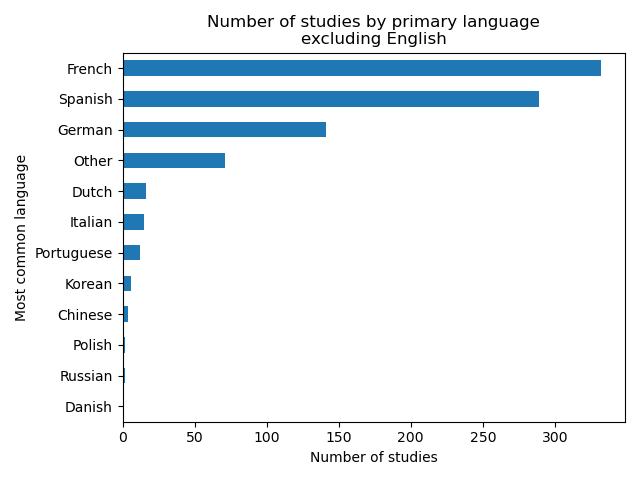



See [Full dataset of studies by language](#Full dataset of studies by language) to download and run your own analyses.

## Contents 
1. [Motivation](#Motivation)
2. [Findings](#Findings)
3. [Full dataset of studies by language](#Full dataset of studies by language)
4. [Methodology](#Methodology)

## Motivation
A large multi-lingual text corpus is difficult for both people and machines to sort through. Many of the submissions in this competition so far have relied on English-only keyword and regular expression searching. We hope that tagging each study in the corpus with primary and secondary languages will help public health experts to find studies in the languages that they understand, and help algorithm developers to build techniques that perform well on the languages in this corpus.

Seeing the distribution of languages in the corpus could also help public health experts to identify blind spots in the dataset coming from missing sources of literature, or competition teams and administrators to identify what language expertise is missing from their teams.

## Findings
In addition to the main takeaways, we observed:
- When the first most common language is "Other", the body and abstract text are usually empty, or only contain tables or lists of references.
- When the second most common language is "Other", the body and abstract text often contains a noticeable amount of chemical formulas, sequences of RNA/DNA/peptides, technical abbreviations, text formatting, or tables.
- When the second most common language is "Greek", the body and abstract text contain formulas and mathematical symbols involving Greek characters.

These observations could be helpful for completing some of the Tasks in this challenge relating to genetics or drug effectiveness.

## Full dataset of studies by language
Here is the [full dataset](https://www.kaggle.com/rebeccaburwei/covid19-studies-by-language).

### Columns
- **paper_id:** identifier for studies from the CORD-19 dataset
- **lang_1:** language with the most bytes in the study
- **lang_2:** language with the second most bytes in the study
- **lang_3:** language with the third most bytes in the study
- **lang_1_percent:** fraction of bytes in the study estimated to be from lang_1 
- **lang_2_percent:** fraction of bytes in the study estimated to be from lang_2
- **lang_3_percent:** fraction of bytes in the study estimated to be from lang_3

### Limitations
The language identification model used is known to under-perform when the document being identified is too short, or less than 2 sentences long. While we have provided language-id predictions for all studies in the CORD-19 dataset, we caution against using the results for studies with very little text in their combined abstracts and bodies. See [Methodology](#Methodology) for more details and references.

## Methodology
### Languages considered
For each study, Relativity identifies up to 3 languages from a pool of over 100 languages. For a full list of supported languages, see the table at the bottom of [this page](https://help.relativity.com/RelativityOne/Content/Solutions/Supported_languages_matrix.htm).

### Text preprocessing
Using the CORD-19 dataset, we concatenated the text from the title, abstract and bodies for each study. We did not include text from references. Relativity also removes punctuation, HTML tags and numbers.

### Language identification
After performing the text preprocessing, Relativity uses a Naive Bayes classifier to estimate the probability of each language for each study. The implementation relies on Google's [Compact Language Detector](https://github.com/CLD2Owners/cld2).

When it comes to language identification, simple classifiers are competitive on documents with enough characters (see [Grefenstette 1995](http://www.uvm.edu/pdodds/teaching/courses/2009-08UVM-300/docs/others/everything/grefenstette1995a.pdf)).
